# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [ ]:
!pip install --user --upgrade tables
!pip install --user pycaret

In [ ]:
# !pip install pycaret[full]==2.3.4
!pip install pycaret

In [ ]:
# Install or upgrade required libraries
!pip install pandas scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [ ]:
region=7
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
4882,3175287,Balijuagan,City of Roxas,Capiz,0.006457,1.298224,0.740146,1.0,0,1,1,3180812,7.843026,133.470134,111.653373,1154.279303,576.583771,280.85149,201.591884,0.639189
3615,3157396,Salvacion,Nueva Valencia,Guimaras,0.690861,0.717076,0.807057,1.0,0,1,1,3168447,14.319592,43.987224,45.407442,451.398342,219.772848,107.08350,86.961410,0.635817


In [ ]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

## Train

In [ ]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,3024628
1,3026009
2,3026010
3,3027392
4,3031522
...,...
9103,3266549
9104,3266550
9105,3267920
9106,3267928


In [ ]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(9108, 1)"
2,Transformed data shape,"(9108, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5779,31965.0539,0.5148,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

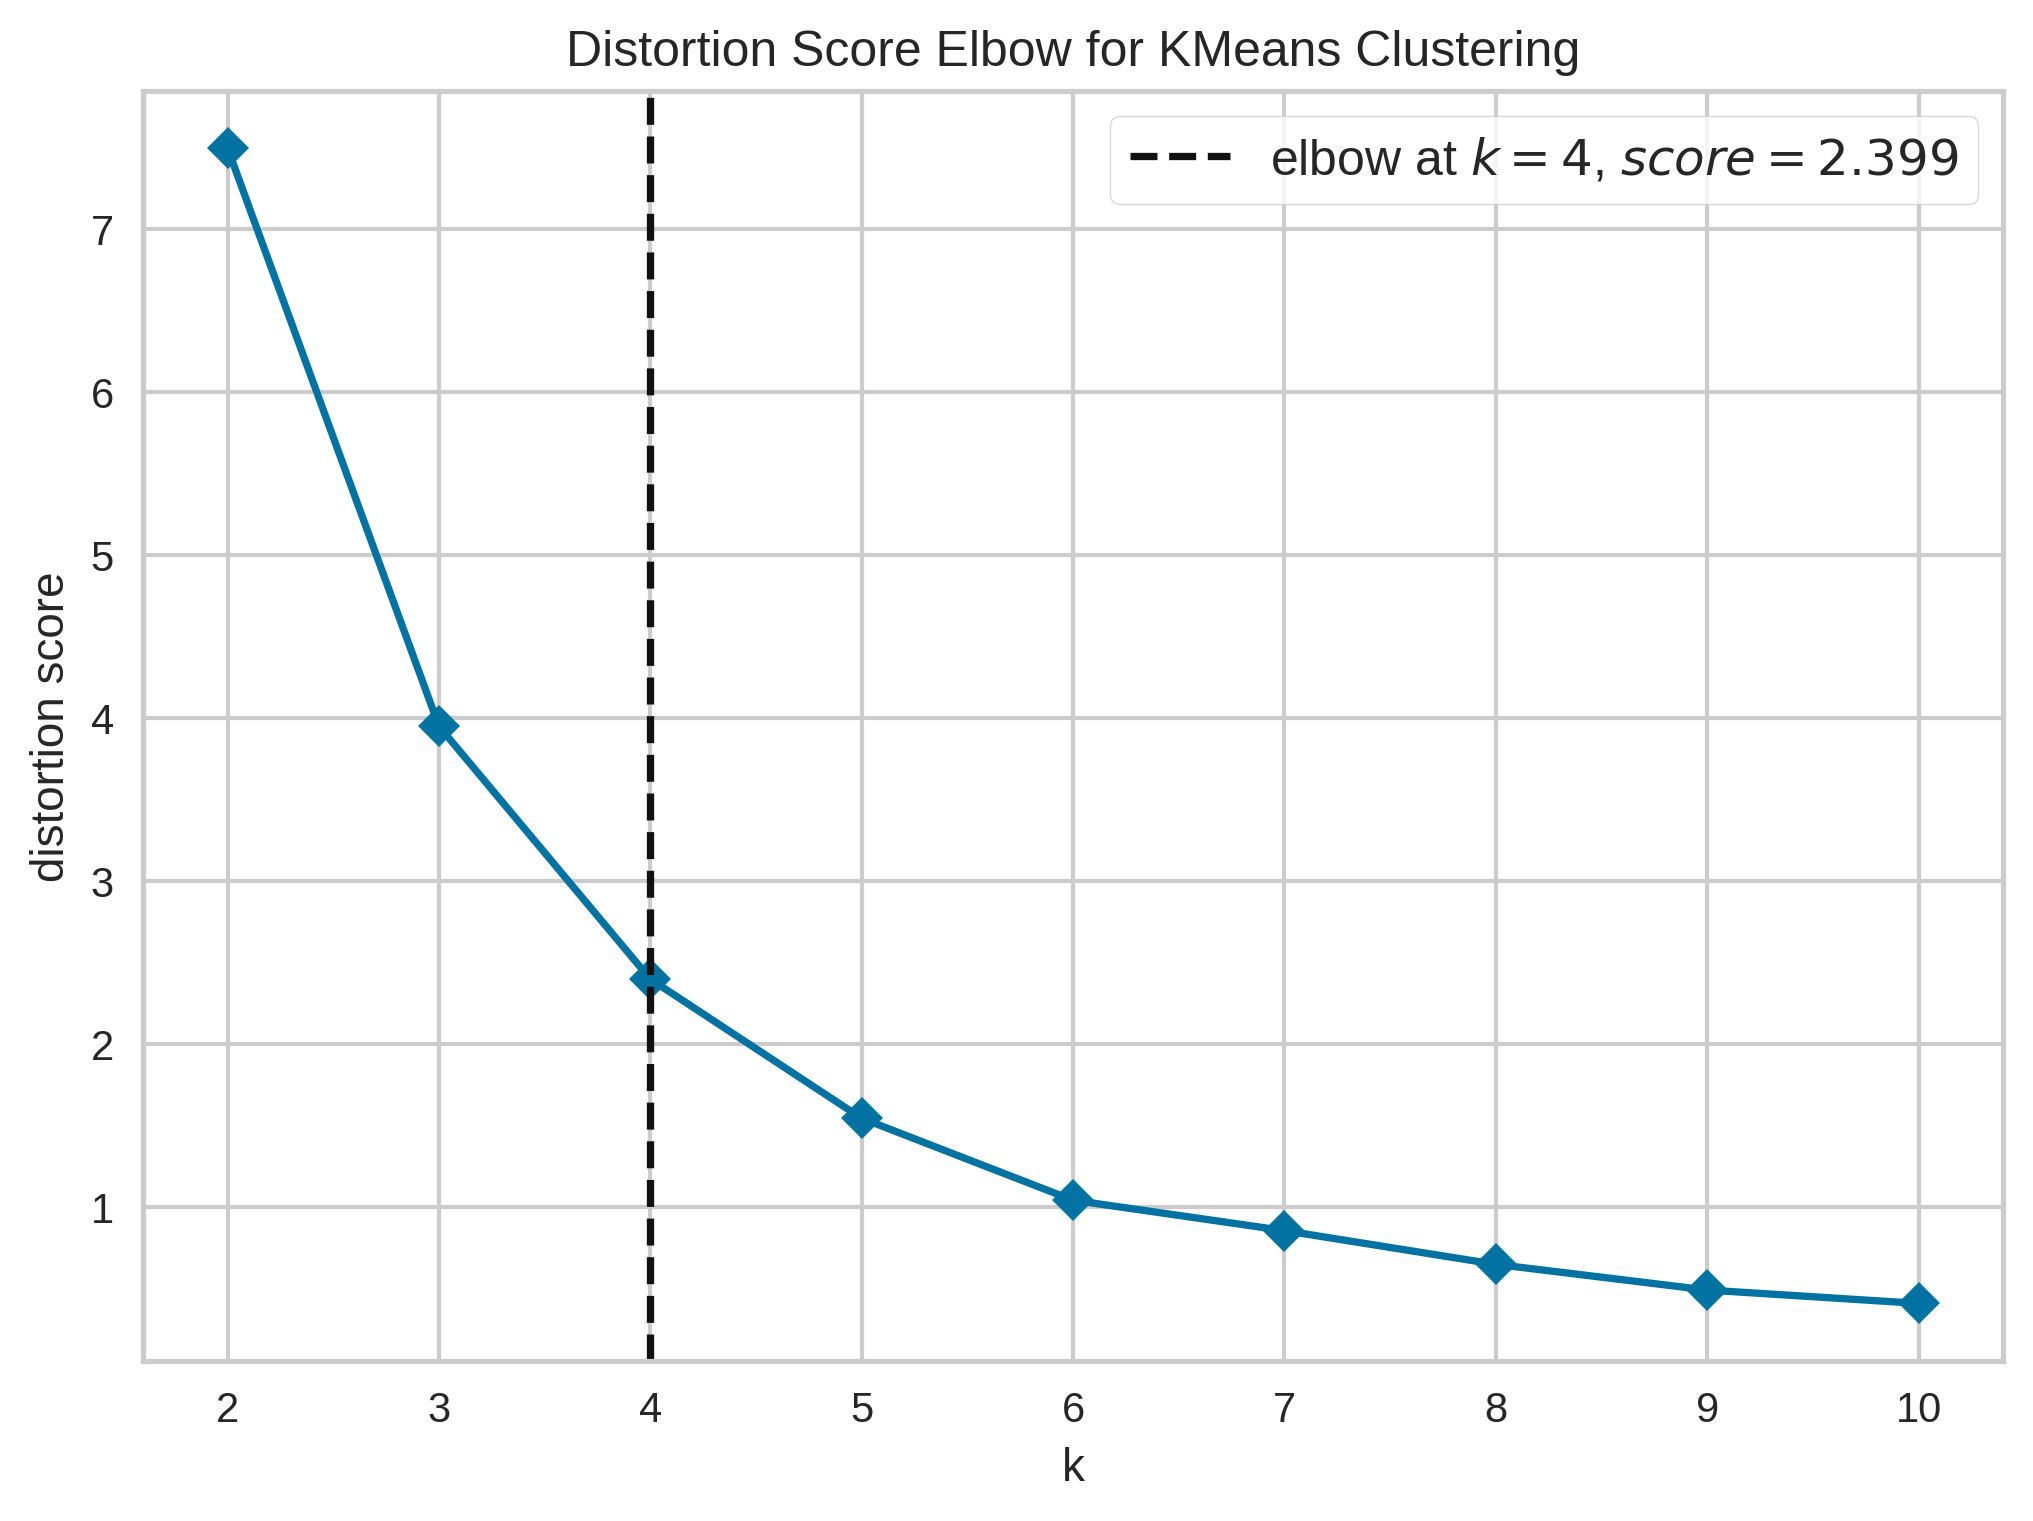

In [ ]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [ ]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [ ]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5779,31965.0539,0.5148,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 3
1,0.395097,Cluster 2
2,0.457228,Cluster 1
3,0.395125,Cluster 2
4,0.500000,Cluster 3
5,0.500000,Cluster 3
6,0.500000,Cluster 3
7,0.500000,Cluster 3
8,0.432167,Cluster 1
9,0.432167,Cluster 1


# Fixing df for BPNN to find candidate locations

In [ ]:
len(HCFAIdf_results['Accessibility Level'].unique())

,HCFAI,Cluster
0,0.500000,Cluster 3
1,0.395097,Cluster 2
2,0.457228,Cluster 1
3,0.395125,Cluster 2
4,0.500000,Cluster 3
...,...,...
9103,0.432418,Cluster 1
9104,0.387334,Cluster 2
9105,0.477743,Cluster 1
9106,0.500000,Cluster 3


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

In [ ]:
for cluster_name, cluster_list in lists.items():
    # print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

max, min, total 0.6391893029212952 | 0.5288808941841125 | 1118
max, min, total 0.47915828227996826 | 0.4227830767631531 | 1966
max, min, total 0.4227471947669983 | 0.3429521918296814 | 1973
max, min, total 0.5288721919059753 | 0.47929275035858154 | 4051


In [ ]:
x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

,HCFAI,Accessibility Level
4882,0.639189,Cluster 0
3615,0.635817,Cluster 0
985,0.635223,Cluster 0
895,0.633524,Cluster 0
8746,0.633065,Cluster 0
...,...,...
6856,0.345520,Cluster 2
6852,0.345393,Cluster 2
7227,0.344382,Cluster 2
6854,0.342952,Cluster 2


In [ ]:
x = x.replace(['Cluster 0'],int(1))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(0))
x = x.replace(['Cluster 3'],int(0))
# x = x.replace(['Cluster 4'],int(0))

In [ ]:
x['ID'] = IDdf
x

,HCFAI,Accessibility Level,ID
0,0.500000,0,3024628
1,0.395097,0,3026009
2,0.457228,0,3026010
3,0.395125,0,3027392
4,0.500000,0,3031522
...,...,...,...
9103,0.432418,0,3266549
9104,0.387334,0,3266550
9105,0.477743,0,3267920
9106,0.500000,0,3267928


In [ ]:
df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI_y,Accessibility Level
0,3024628,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,29.808382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,3026009,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,29.304916,3.843366,0.711107,22.780833,10.827456,5.290977,4.427490,0.395097,0.395097,0
2,3026010,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,29.040702,247.066082,45.712663,1464.437877,696.029735,340.123987,284.615768,0.457228,0.457228,0
3,3027392,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,28.658474,24.104008,4.459772,142.871988,67.905340,33.182828,27.767392,0.395125,0.395125,0
4,3031522,Semirara,Caluya,Antique,0.007851,1.365579,0.630727,0.0,0,0,...,28.262097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,3266549,Rizal,City of Escalante,Negros Occidental,0.796297,1.190042,0.874720,0.0,0,0,...,7.995743,123.656030,156.336225,1227.330357,599.673120,273.806853,233.017252,0.432418,0.432418,0
9104,3266550,Rizal,City of Escalante,Negros Occidental,0.796297,1.190042,0.874720,0.0,0,0,...,8.845778,8.624322,10.189206,79.948800,38.878974,17.457282,14.466600,0.387334,0.387334,0
9105,3267920,Molocaboc,City of Sagay,Negros Occidental,0.007568,1.350957,0.694776,0.0,0,0,...,14.904871,115.010504,63.529618,929.065544,453.469818,222.572636,198.037038,0.477743,0.477743,0
9106,3267928,Old Poblacion,City of Escalante,Negros Occidental,0.004439,1.154519,0.845206,0.0,0,0,...,6.566200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,3024628,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,29.808382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,3026009,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,29.304916,3.843366,0.711107,22.780833,10.827456,5.290977,4.427490,0.395097,0.395097,0
2,3026010,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,29.040702,247.066082,45.712663,1464.437877,696.029735,340.123987,284.615768,0.457228,0.457228,0
3,3027392,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,28.658474,24.104008,4.459772,142.871988,67.905340,33.182828,27.767392,0.395125,0.395125,0
4,3031522,Semirara,Caluya,Antique,0.007851,1.365579,0.630727,0.0,0,0,...,28.262097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,3266549,Rizal,City of Escalante,Negros Occidental,0.796297,1.190042,0.874720,0.0,0,0,...,7.995743,123.656030,156.336225,1227.330357,599.673120,273.806853,233.017252,0.432418,0.432418,0
9104,3266550,Rizal,City of Escalante,Negros Occidental,0.796297,1.190042,0.874720,0.0,0,0,...,8.845778,8.624322,10.189206,79.948800,38.878974,17.457282,14.466600,0.387334,0.387334,0
9105,3267920,Molocaboc,City of Sagay,Negros Occidental,0.007568,1.350957,0.694776,0.0,0,0,...,14.904871,115.010504,63.529618,929.065544,453.469818,222.572636,198.037038,0.477743,0.477743,0
9106,3267928,Old Poblacion,City of Escalante,Negros Occidental,0.004439,1.154519,0.845206,0.0,0,0,...,6.566200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')

In [ ]:
df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,3024628,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,3053645,29.808382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
1,3026009,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,3053645,29.304916,3.843366,0.711107,22.780833,10.827456,5.290977,4.427490,0.395097,0
2,3026010,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,3053645,29.040702,247.066082,45.712663,1464.437877,696.029735,340.123987,284.615768,0.457228,0
3,3027392,Harigue,Caluya,Antique,0.981653,1.291155,0.657261,0.0,0,0,...,3053645,28.658474,24.104008,4.459772,142.871988,67.905340,33.182828,27.767392,0.395125,0
4,3031522,Semirara,Caluya,Antique,0.007851,1.365579,0.630727,0.0,0,0,...,3053645,28.262097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,3266549,Rizal,City of Escalante,Negros Occidental,0.796297,1.190042,0.874720,0.0,0,0,...,3261018,7.995743,123.656030,156.336225,1227.330357,599.673120,273.806853,233.017252,0.432418,0
9104,3266550,Rizal,City of Escalante,Negros Occidental,0.796297,1.190042,0.874720,0.0,0,0,...,3261018,8.845778,8.624322,10.189206,79.948800,38.878974,17.457282,14.466600,0.387334,0
9105,3267920,Molocaboc,City of Sagay,Negros Occidental,0.007568,1.350957,0.694776,0.0,0,0,...,3261018,14.904871,115.010504,63.529618,929.065544,453.469818,222.572636,198.037038,0.477743,0
9106,3267928,Old Poblacion,City of Escalante,Negros Occidental,0.004439,1.154519,0.845206,0.0,0,0,...,3261018,6.566200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0


In [ ]:
df.to_csv(f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}_clusters.csv')